# Preprocessing

In [1]:
%run project_functions.ipynb

Using TensorFlow backend.


In [2]:
file_name = 'FB.json'
csv_name = 'FB.csv'

In [3]:
#Features
company = stock_twits_text_parser(file_name)
company_metrics = stock_twits_metrics(company, 3, file_name)

#Labels
company_return = return_over_period_T(csv_name,3)

#Cleaned Data
agg_data = feature_selector(company_metrics, company_return, 'close_return', 25, 1000)
company_data = split_data(agg_data, 0.7, 'all', 'close_return', 'bin')

#Split
X_train = company_data['X_train']
Y_train = company_data['Y_train']
X_test = company_data['X_test']
Y_test = company_data['Y_test']

#Define Values for Regularization Parameter
reg_vals = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]

# Support Vector Machine - Linear

In [4]:
#Find Best Model
clf_lin_svc =  get_best_SVC('linear', reg_vals, 5, X_train, Y_train)

#Predict
pred_train_lin_svc = clf_lin_svc.predict(X_train)
pred_test_lin_svc = clf_lin_svc.predict(X_test)

Best Parameters: 
{'C': 100.0, 'penalty': 'l2'}


In [5]:
#Generate Confusion Matrices
confusion_train_lin_svc = confusion_matrix(Y_train, pred_train_lin_svc)
confusion_test_lin_svc = confusion_matrix(Y_test, pred_test_lin_svc)

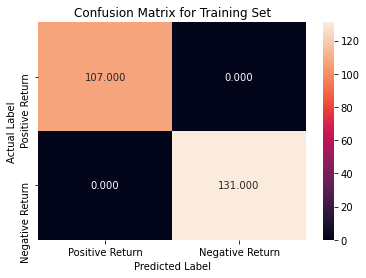

In [6]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train_lin_svc, "Training")

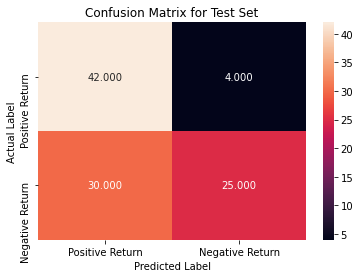

In [7]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test_lin_svc, "Test")

In [8]:
#Calculate Metrics
tablelin_svc = create_metrics_table(Y_train, pred_train_lin_svc, Y_test, pred_test_lin_svc)
tablelin_svc

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.000000,1.000000,1.000000,1.000000
Test,0.454545,0.862069,0.595238,0.663366


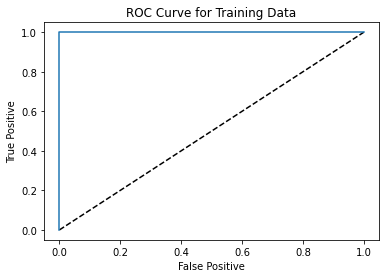

In [9]:
#Generate ROC Curves for Training
pred_train_prob_lin_svc = clf_lin_svc.decision_function(X_train)
FPR_train, TPR_train, Threshold_train = roc_curve(Y_train, pred_train_prob_lin_svc)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_train, TPR_train, "Training")

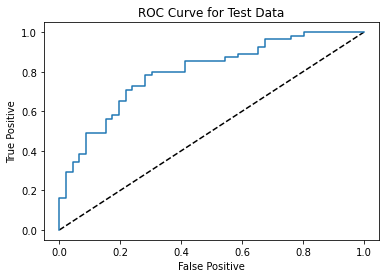

In [10]:
#Generate ROC Curves for Test
pred_test_prob_lin_svc = clf_lin_svc.decision_function(X_test)
FPR_test, TPR_test, Threshold_test = roc_curve(Y_test, pred_test_prob_lin_svc)

#Plot ROC Curve for Test Data
plot_ROC_curve(FPR_test, TPR_test, "Test")

# Support Vector Machine - All

In [11]:
#Find Best Model
clf_svc =  get_best_SVC('all', reg_vals, 5, X_train, Y_train)

#Predict
pred_train_svc = clf_svc.predict(X_train)
pred_test_svc = clf_svc.predict(X_test)

Best Parameters: 
{'C': 1000.0, 'kernel': 'linear'}


In [12]:
#Generate Confusion Matrices
confusion_train_svc = confusion_matrix(Y_train, pred_train_svc)
confusion_test_svc = confusion_matrix(Y_test, pred_test_svc)

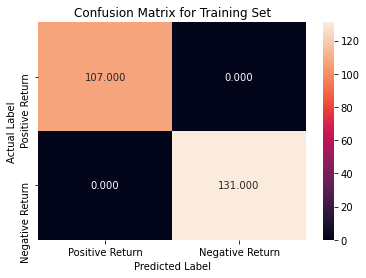

In [13]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train_svc, "Training")

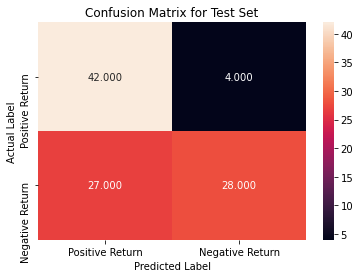

In [14]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test_svc, "Test")

In [15]:
#Calculate Metrics
tablesvc = create_metrics_table(Y_train, pred_train_svc, Y_test, pred_test_svc)
tablesvc

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.000000,1.000,1.000000,1.000000
Test,0.509091,0.875,0.643678,0.693069


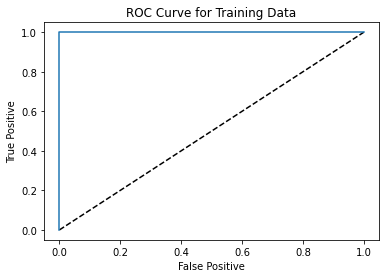

In [16]:
#Generate ROC Curves for Training
pred_train_prob_svc = clf_svc.decision_function(X_train)
FPR_train, TPR_train, Threshold_train = roc_curve(Y_train, pred_train_prob_svc)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_train, TPR_train, "Training")

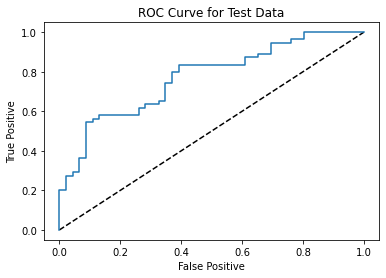

In [17]:
#Generate ROC Curves for Test
pred_test_prob_svc = clf_svc.decision_function(X_test)
FPR_test, TPR_test, Threshold_test = roc_curve(Y_test, pred_test_prob_svc)

#Plot ROC Curve for Test Data
plot_ROC_curve(FPR_test, TPR_test, "Test")